# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are there any connections between species category and their conservation status?
- What kind of wolf is more observed in the wild?
- Which specie categories are the most spotted?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are there any connections between species category and their conservation status?
- What kind of wolf is more observed in the wild?
- Which specie categories are the most spotted?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 


## Import Python Modules

First, import the primary modules that will be used in this project:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Data and Explore the Data

#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [2]:
# Load and inspect data
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
# columns of interest investigation
print('Conservation statuses: '+ str(species.conservation_status.unique()))
print('Species Categories: ' + str(species.category.unique()))
print('Total number of species: ' + str(species.scientific_name.nunique()))
print(species.info())

Conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
Species Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
Total number of species: 5541
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


#### sightings

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [4]:
sightings = pd.read_csv('observations.csv')
sightings.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
# columns of interest investigation
print('Park names: ' + str(sightings.park_name.unique()))
print('Checking if number of species matches to that number in species df:'
      +str(sightings.scientific_name.nunique()))
print(sightings.info())

Park names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Checking if number of species matches to that number in species df:5541
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


## Data cleaning and wrangling

In [6]:
# Checking for duplicates for whole DataFrame
duplicates_si = sightings.duplicated()
print(duplicates_si.value_counts())
duplicates_sp = species.duplicated()
print(duplicates_sp.value_counts())

# Removing duplicates from sightings DataFrame
sightings = sightings.drop_duplicates()
# checking result
duplicates_si = sightings.duplicated()
print(duplicates_si.value_counts())

# Checking for duplicates inside scientific_name subset of species DataFrame
duplicates_names = species[species.duplicated(['scientific_name'], keep=False)]
print(duplicates_names.info())
# Removing duplicates by scientific_name subset
species = species.drop_duplicates(subset=['scientific_name'])

False    23281
True        15
dtype: int64
False    5824
dtype: int64
False    23281
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 4 to 5750
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             557 non-null    object
 1   scientific_name      557 non-null    object
 2   common_names         557 non-null    object
 3   conservation_status  23 non-null     object
dtypes: object(4)
memory usage: 21.8+ KB
None


Some data in *sightings* DataFrame raise questions. For instance if we pull data for "Cervus elaphus" in *scientific_name* we see that it is observed different number of times at the same park. Which can not be the case for the same specie.

In [7]:
df=sightings[(sightings.scientific_name == 'Cervus elaphus')]
df

,scientific_name,park_name,observations
12986,Cervus elaphus,Yellowstone National Park,225
13658,Cervus elaphus,Yellowstone National Park,270
18491,Cervus elaphus,Great Smoky Mountains National Park,60
19221,Cervus elaphus,Yosemite National Park,203
19475,Cervus elaphus,Great Smoky Mountains National Park,101
20291,Cervus elaphus,Bryce National Park,96
20464,Cervus elaphus,Bryce National Park,87
21725,Cervus elaphus,Yosemite National Park,176


Let's merge those rows. Since we don't know which number of observations is a correct, we can take the average of those numbers and place it instead. 

In [8]:
sightings_clean = sightings.groupby(['scientific_name','park_name'])['observations'].mean().round().reset_index()
# Checking the autcome
df=sightings_clean[(sightings_clean.scientific_name == 'Cervus elaphus')]
df

,scientific_name,park_name,observations
4672,Cervus elaphus,Bryce National Park,92.0
4673,Cervus elaphus,Great Smoky Mountains National Park,80.0
4674,Cervus elaphus,Yellowstone National Park,248.0
4675,Cervus elaphus,Yosemite National Park,190.0


The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `Not in Danger`, since they represent that species are not in danger.

In [9]:
species = species.fillna(value={'conservation_status': 'Not in Danger'})
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not in Danger
1,Mammal,Bos bison,"American Bison, Bison",Not in Danger
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not in Danger
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not in Danger
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not in Danger


Now we can merge two DataFrames together for future visualizations

In [10]:
wild_life = pd.merge(species, sightings_clean)
wild_life.head(12)

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not in Danger,Bryce National Park,130.0
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not in Danger,Great Smoky Mountains National Park,98.0
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not in Danger,Yellowstone National Park,270.0
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not in Danger,Yosemite National Park,117.0
4,Mammal,Bos bison,"American Bison, Bison",Not in Danger,Bryce National Park,68.0
5,Mammal,Bos bison,"American Bison, Bison",Not in Danger,Great Smoky Mountains National Park,77.0
6,Mammal,Bos bison,"American Bison, Bison",Not in Danger,Yellowstone National Park,269.0
7,Mammal,Bos bison,"American Bison, Bison",Not in Danger,Yosemite National Park,128.0
8,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not in Danger,Bryce National Park,99.0
9,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not in Danger,Great Smoky Mountains National Park,56.0


## Analysis

*What is the distribution of conservation_status for animals?*
We will breakdown all statutes in a single chart and place it on one figure.

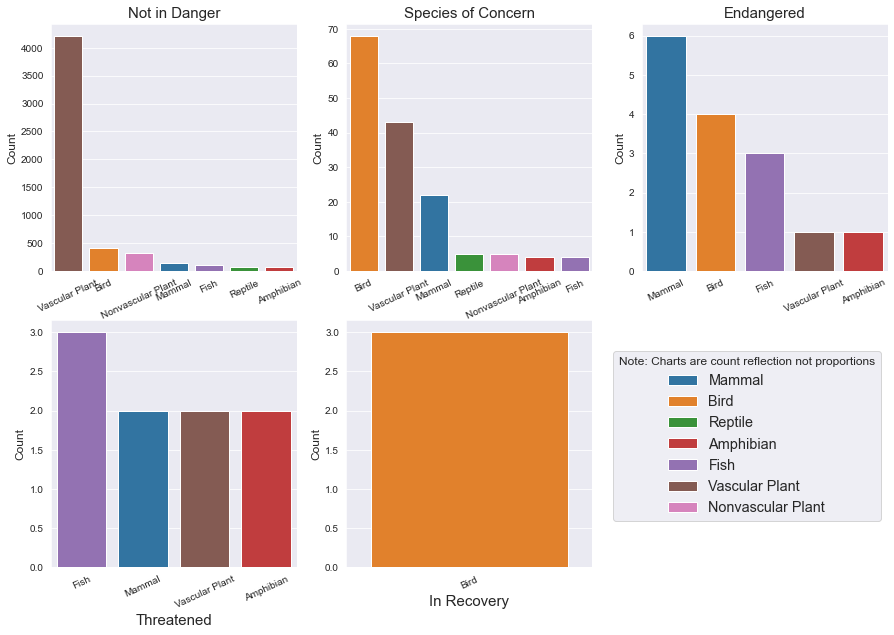

<Figure size 432x288 with 0 Axes>

In [25]:
# Creation of figure chart for all conservation statuses
fig = plt.figure(figsize=(15, 10))
# Initiate counter for subplots map
counter = 0
hue_order=species.category.unique()
# writing function for to plot all charts in one figure
for i in species.conservation_status.unique():
    df = species[(species.conservation_status == i)]
    counter += 1 
    # setting hue order for sync colors on all subplots
    
    # subplots map
    plt.subplot(2,3,counter)
    # plot style
    sns.set_style('darkgrid')
    # plot type with settings
    sns.countplot(x=df.category,hue=df.category, hue_order=hue_order, dodge=False,
                  order = df.category.value_counts(ascending=False).index).legend_.remove()
    # plot adjustments
    plt.xticks(rotation=25, fontsize=10)
    plt.ylabel('Count', fontsize=12)
    # skipping unnecessary labels
    if counter > 3:
        plt.xlabel(i, fontsize=15)
        plt.title('')
    
    else:
        plt.xlabel('')
        plt.title(i,fontsize=15)
    
# placing legend on the 6th subplot
fig.legend(labels=hue_order,title='Note: Charts are count reflection not proportions',
           fontsize='x-large',title_fontsize=12, 
           loc='lower right',bbox_to_anchor=(0.9,0.18))
plt.show()
plt.clf()

*Are certain types of species more likely to be endangered?*
To answer that question we will look at conservation status percentage. In other words what is the percentage of species in particular category belong to one of conservation status.

In [12]:
# Let's count category species for each conservation status
new_df1 = species.groupby(['conservation_status','category']).scientific_name.count().reset_index()
new_df1.columns = ['conservation_status','category', 'count']
# print(new_df1)
# Count total number of speacies in each category
new_df2 = new_df1.groupby(['category'])['count'].sum().reset_index()
new_df2.columns = ['category', 'total']

# Calculate conservation percentage for each category 
# Note, percentage for 'Not in Danger' stands for opposite. The higher percentage the less category is affected.
new_df3 = pd.merge(new_df1, new_df2)
new_df3['conservation_pct'] = round((new_df3['count'] / new_df3['total'])*100,1)
new_df3 = new_df3.sort_values('conservation_status')
# Saving table outcome as picture
import dataframe_image as dfi
dfi.export(new_df3, 'new_df3.png')
new_df3

,conservation_status,category,count,total,conservation_pct
0,Endangered,Amphibian,1,79,1.3
4,Endangered,Bird,4,488,0.8
8,Endangered,Fish,3,125,2.4
12,Endangered,Mammal,6,176,3.4
16,Endangered,Vascular Plant,1,4262,0.0
5,In Recovery,Bird,3,488,0.6
1,Not in Danger,Amphibian,72,79,91.1
20,Not in Danger,Nonvascular Plant,328,333,98.5
6,Not in Danger,Bird,413,488,84.6
9,Not in Danger,Fish,115,125,92.0


*Are there any connections between species category and their conservation status?*
Since we have several conservation statuses that are part of so called "In Danger" cluster, we will look at the one that is opposite, which is "Not in Danger" and simply make assumptions based on it.

<Figure size 576x432 with 0 Axes>

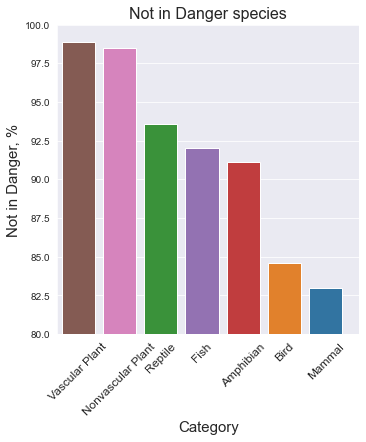

<Figure size 432x288 with 0 Axes>

In [13]:
# filter DataFrame
not_in_danger = new_df3[(new_df3.conservation_status == 'Not in Danger')].reset_index()
not_in_danger = not_in_danger.sort_values(by='conservation_pct',ascending=False)
#plot chart
plt.figure(figsize=(8,6))
sns.catplot(x = 'category', y='conservation_pct', 
            hue = 'category', data=not_in_danger, kind='bar',  
            hue_order=hue_order, dodge=False
            )
plt.axis([-0.5,6.8,80,100])
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Not in Danger, %', fontsize=15)
plt.title('Not in Danger species', fontsize=16)
plt.show()
plt.clf()

From the chart above we can see connection in conservation status between different species. The least developed type of species are less in danger. For example 98% of plants (least complex) are not in danger comparing to 83% of mammals (more complex) not in danger. A linear correlation can be observed between categories. The more complex specie is the more in danger it is. 

*A closer look into endagered species*

<Figure size 576x432 with 0 Axes>

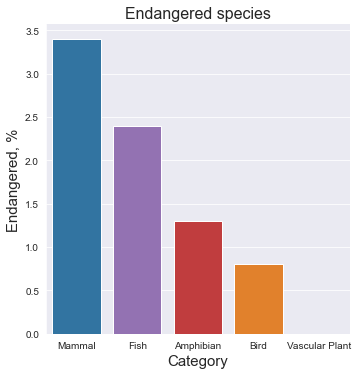

<Figure size 432x288 with 0 Axes>

In [14]:
# Lets visualize the percetage of species that are 'Endangered'
# filter DataFrame
endangered = new_df3[(new_df3.conservation_status == 'Endangered')].reset_index()
endangered = endangered.sort_values(by='conservation_pct',ascending=False)
#plot chart
plt.figure(figsize=(8,6))
sns.catplot(x = 'category', y='conservation_pct', 
            hue = 'category', data=endangered, kind='bar',  
            hue_order=hue_order, dodge=False
            )
plt.xlabel('Category', fontsize=15)
plt.ylabel('Endangered, %', fontsize=15)
plt.title('Endangered species', fontsize=16)
plt.show()
plt.clf()

*Let's find what kind of mammals are endagered*

In [15]:
# Let's see mammals that are engangered
end_mammals = wild_life[(wild_life.conservation_status == 'Endangered') & (wild_life.category =='Mammal')]
end_mammals_list = list(end_mammals.common_names.unique())
print(end_mammals_list)

['Gray Wolf', 'Red Wolf', 'Gray Myotis', 'Indiana Bat, Indiana Or Social Myotis', 'Carolina Northern Flying Squirrel, Northern Flying Squirrel', 'Sierra Nevada Bighorn Sheep']


*What kind of wolf is more observed in the wild?*

<Figure size 576x432 with 0 Axes>

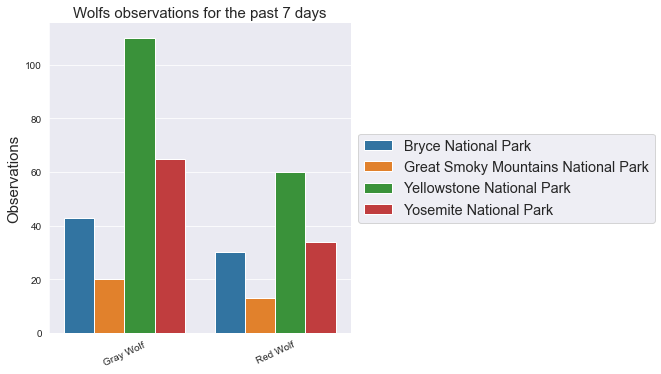

<Figure size 432x288 with 0 Axes>

In [16]:
# Wolfs observations chart for each park
wolfs = wild_life[(wild_life['common_names'].str.contains("Gray Wolf|Red Wolf"))]
hue_orders = wild_life.park_name.unique()
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.catplot(x = 'common_names', y='observations', 
            hue = 'park_name', data=wolfs, kind='bar', dodge=True, 
            hue_order=hue_orders, legend=False)

plt.xlabel('')
plt.ylabel('Observations', fontsize=15)
plt.xticks(rotation=25, fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, 
           fontsize='x-large')
plt.title('Wolfs observations for the past 7 days',fontsize=15)
plt.show()
plt.clf()

*Which species the most spotted?*

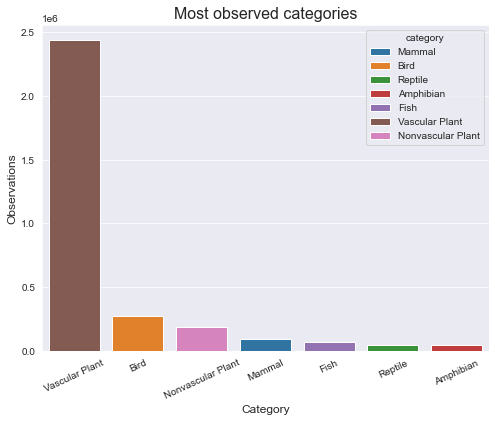

<Figure size 432x288 with 0 Axes>

In [17]:
# Filter DataFramre by total observations
total_obs = wild_life.groupby(['category'])['observations'].sum().reset_index()
total_obs = total_obs.sort_values(by='observations',ascending=False)
# ploting barchart
plt.figure(figsize=(8,6))
sns.barplot(x='category', y='observations', data=total_obs, hue='category', 
            hue_order=hue_order, dodge=False)
plt.xticks(rotation=25, fontsize=10)
plt.title('Most observed categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Observations', fontsize=12)
plt.show()
plt.clf()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are there any connections between species category and their conservation status?
    - The least developed type of species are less in danger. For example 98% of plants (least complex) are 'not in danger' comparing to 83% of mammals (more complex) 'not in danger'. A linear correlation can be observed between categories. The more complex specie is the more in danger it is. 
- What kind of wolf is more observed in the wild?
    - the study found that Gray Wolf was observed more often than Red Wolf. It most likely to be found in Yellowstone National Park and least likely in Great Smoky Mountains National Park.
- Which specie categories are the most spotted? 
    - Vascular plants observed the most and Amphibians observed the least within US National Parks.


## Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 